In [1]:
import uproot
import numpy as np
import pandas as pd
import math

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from matplotlib import gridspec
from scipy.signal import savgol_filter

In [3]:
def integral(array,integration_interval,x_domain,nbin):
    s=0
    Δx=x_domain[1]-x_domain[0]
    #ϵ=abs(Δx)/nbin
    i_min=int(round(nbin*(integration_interval[0]-x_domain[0])/Δx))
    i_max=int(round(nbin*(integration_interval[1]-x_domain[0])/Δx))
    
    for i in range(i_min,i_max):
        s=array[i]+s
    return s

In [4]:
#### WORKS ONLY FOR MONOTONIC FUNCTIONS (INVERTIBLE FUNCTIONS) ####
#### FOR INCREASING F's, SET sgn=+1 ####
#### FOR DECREASING F's, SET sgn=-1 ####
def inverse(y,f,interval,sgn):
    if y<0.0 or y>1.0:
        return 'nan';
    ϵ=1e-7
    ϵ2=1e-7
    x_min=interval[0]
    x_max=interval[1]
    Δx=x_max-x_min
    q=1;n=0;
#    print(q, x_min, x_max)
    while abs(q)>ϵ and abs(Δx)>ϵ2:
#        x0=unif(x_min,x_max)    
        x0=0.5*(x_max+x_min)
            
        t=f(x0)
        q=t-y
        if sgn*q<=0:
            x_min=x0
        if sgn*q>0:
            x_max=x0
            
        Δx=x_max-x_min
        n=n+1
#        print(x0, t, sgn*q, [x_min, x_max])
    return x0,q,n

In [5]:
class algs:
    def __init__(self,path,file_name):

        file_empf201903=uproot.open(path+file_name)

        empf201903_ip2d_exB=np.array(file_empf201903["ip2d_llr_B"])
        empf201903_ip2d_exC=np.array(file_empf201903["ip2d_llr_C"])
        empf201903_ip2d_l=np.array(file_empf201903["ip2d_llr_l"])
        #print(len(empf201903_ip2d_exB)==len(empf201903_ip2d_l),len(empf201903_ip2d_l))
        empf201903_ip3d_exB=np.array(file_empf201903["ip3d_llr_B"])
        empf201903_ip3d_exC=np.array(file_empf201903["ip3d_llr_C"])
        empf201903_ip3d_l=np.array(file_empf201903["ip3d_llr_l"])
        #print(len(empf201903_ip3d_exB)==len(empf201903_ip3d_l),len(empf201903_ip3d_l))
        empf201903_rnnip_exB=np.array(file_empf201903["rnnip_llr_B"])
        empf201903_rnnip_exC=np.array(file_empf201903["rnnip_llr_C"])
        empf201903_rnnip_l=np.array(file_empf201903["rnnip_llr_l"])
        #print(len(empf201903_rnnip_exB)==len(empf201903_rnnip_l),len(empf201903_rnnip_l))
        empf201903_sv1_exB=np.array(file_empf201903["sv1_llr_B"])
        empf201903_sv1_exC=np.array(file_empf201903["sv1_llr_C"])
        empf201903_sv1_l=np.array(file_empf201903["sv1_llr_l"])
        #print(len(empf201903_sv1_exB)==len(empf201903_sv1_l),len(empf201903_sv1_exB))
        empf201903_jf_exB=np.array(file_empf201903["jf_llr_B"])
        empf201903_jf_exC=np.array(file_empf201903["jf_llr_C"])
        empf201903_jf_l=np.array(file_empf201903["jf_llr_l"])
        #print(len(empf201903_jf_exB)==len(empf201903_jf_l),len(empf201903_jf_exB))
        empf201903_dl1_exB=np.array(file_empf201903["DL1_B"])
        empf201903_dl1_exC=np.array(file_empf201903["DL1_C"])
        empf201903_dl1_l=np.array(file_empf201903["DL1_light"])
        #print(len(empf201903_dl1_exB)==len(empf201903_dl1_l),len(empf201903_dl1_exB))

        n_B=np.array(file_empf201903["nBjets"]).sum()
        n_C=np.array(file_empf201903["nCjets"]).sum()
        n_l=np.array(file_empf201903["nljets"]).sum()
        
        empf201903_ip2d_exB=np.delete(empf201903_ip2d_exB, [0,len(empf201903_ip2d_exB)-1])
        empf201903_ip2d_exC=np.delete(empf201903_ip2d_exC, [0,len(empf201903_ip2d_exC)-1])
        empf201903_ip2d_l=np.delete(empf201903_ip2d_l, [0,len(empf201903_ip2d_l)-1])
        empf201903_ip3d_exB=np.delete(empf201903_ip3d_exB, [0,len(empf201903_ip3d_exB)-1])
        empf201903_ip3d_exC=np.delete(empf201903_ip3d_exC, [0,len(empf201903_ip3d_exC)-1])
        empf201903_ip3d_l=np.delete(empf201903_ip3d_l, [0,len(empf201903_ip3d_l)-1])
        empf201903_rnnip_exB=np.delete(empf201903_rnnip_exB, [0,len(empf201903_rnnip_exB)-1])
        empf201903_rnnip_exC=np.delete(empf201903_rnnip_exC, [0,len(empf201903_rnnip_exC)-1])
        empf201903_rnnip_l=np.delete(empf201903_rnnip_l, [0,len(empf201903_rnnip_l)-1])
        empf201903_sv1_exB=np.delete(empf201903_sv1_exB, [0,len(empf201903_sv1_exB)-1])
        empf201903_sv1_exC=np.delete(empf201903_sv1_exC, [0,len(empf201903_sv1_exC)-1])
        empf201903_sv1_l=np.delete(empf201903_sv1_l, [0,len(empf201903_sv1_l)-1])
        empf201903_jf_exB=np.delete(empf201903_jf_exB, [0,len(empf201903_jf_exB)-1])
        empf201903_jf_exC=np.delete(empf201903_jf_exC, [0,len(empf201903_jf_exC)-1])
        empf201903_jf_l=np.delete(empf201903_jf_l, [0,len(empf201903_jf_l)-1])
        empf201903_dl1_exB=np.delete(empf201903_dl1_exB, [0,len(empf201903_dl1_exB)-1])
        empf201903_dl1_exC=np.delete(empf201903_dl1_exC, [0,len(empf201903_dl1_exC)-1])
        empf201903_dl1_l=np.delete(empf201903_dl1_l, [0,len(empf201903_dl1_l)-1])

        nbin=len(empf201903_ip2d_exB)
        x_min=-20
        x_max=50
        xaxis=[x_min,x_max]
        Δx=x_max-x_min
        interval=Δx*(np.arange(0,nbin)/nbin)+x_min
        #print(len(interval)==nbin,nbin)

        nbin_dl1=len(empf201903_dl1_exB)
        xdl1_min=-20
        xdl1_max=50
        xdl1axis=[xdl1_min,xdl1_max]
        Δx_dl1=xdl1_max-xdl1_min
        interval_dl1=Δx_dl1*(np.arange(0,nbin_dl1)/nbin_dl1)+xdl1_min
        #print(len(interval_dl1)==nbin_dl1,nbin_dl1)

        empf201903_N_l=integral(empf201903_ip2d_l,xaxis,xaxis,nbin)
        empf201903_N_exB=integral(empf201903_ip2d_exB,xaxis,xaxis,nbin)
        empf201903_N_exC=integral(empf201903_ip2d_exC,xaxis,xaxis,nbin)

        empf201903_N_ip3dl=integral(empf201903_ip3d_l,xaxis,xaxis,nbin)
        empf201903_N_ip3dexB=integral(empf201903_ip3d_exB,xaxis,xaxis,nbin)
        empf201903_N_ip3dexC=integral(empf201903_ip3d_exC,xaxis,xaxis,nbin)

        empf201903_N_rnnipl=integral(empf201903_rnnip_l,xaxis,xaxis,nbin)
        empf201903_N_rnnipexB=integral(empf201903_rnnip_exB,xaxis,xaxis,nbin)
        empf201903_N_rnnipexC=integral(empf201903_rnnip_exC,xaxis,xaxis,nbin)

        empf201903_N_sv1l=integral(empf201903_sv1_l,xaxis,xaxis,nbin)
        empf201903_N_sv1exB=integral(empf201903_sv1_exB,xaxis,xaxis,nbin)
        empf201903_N_sv1exC=integral(empf201903_sv1_exC,xaxis,xaxis,nbin)

        empf201903_N_jfl=integral(empf201903_jf_l,xaxis,xaxis,nbin)
        empf201903_N_jfexB=integral(empf201903_jf_exB,xaxis,xaxis,nbin)
        empf201903_N_jfexC=integral(empf201903_jf_exC,xaxis,xaxis,nbin)

        empf201903_N_dl1l=integral(empf201903_dl1_l,xdl1axis,xdl1axis,nbin_dl1)
        empf201903_N_dl1exB=integral(empf201903_dl1_exB,xdl1axis,xdl1axis,nbin_dl1)
        empf201903_N_dl1exC=integral(empf201903_dl1_exC,xdl1axis,xdl1axis,nbin_dl1)

        xM_ip2d_B=empf201903_N_exB/n_B
        xM_ip3d_B=empf201903_N_ip3dexB/n_B
        xM_rnnip_B=empf201903_N_rnnipexB/n_B
        xM_sv1_B=empf201903_N_sv1exB/n_B
        xM_jf_B=empf201903_N_jfexB/n_B
        xM_dl1_B=empf201903_N_dl1exB/n_B
        xM_ip2d_C=empf201903_N_exC/n_C
        xM_ip3d_C=empf201903_N_ip3dexC/n_C
        xM_rnnip_C=empf201903_N_rnnipexC/n_C
        xM_sv1_C=empf201903_N_sv1exC/n_C
        xM_jf_C=empf201903_N_jfexC/n_C
        xM_dl1_C=empf201903_N_dl1exC/n_C
        xM_ip2d_l=empf201903_N_l/n_l
        xM_ip3d_l=empf201903_N_ip3dl/n_l
        xM_rnnip_l=empf201903_N_rnnipl/n_l
        xM_sv1_l=empf201903_N_sv1l/n_l
        xM_jf_l=empf201903_N_jfl/n_l
        xM_dl1_l=empf201903_N_dl1l/n_l
        print('Maximum efficiency \epsilon: ip2d, ip3d, rnnip, sv1, jf, dl1')
        print(xM_ip2d_B,xM_ip3d_B,xM_rnnip_B,xM_sv1_B,xM_jf_B,xM_dl1_B)
        print(xM_ip2d_C,xM_ip3d_C,xM_rnnip_C,xM_sv1_C,xM_jf_C,xM_dl1_C)        
        print(xM_ip2d_l,xM_ip3d_l,xM_rnnip_l,xM_sv1_l,xM_jf_l,xM_dl1_l)

        x_ax=np.array([])

        for i in range(0,nbin):

            x=i/nbin
            x_ax=np.append(x_ax,x)


        cut_v=np.array([])
        #cut_inverse=np.array([])

        empf201903_rocip2d_rej=np.array([])
        empf201903_rocip2d_rej_c=np.array([])

        empf201903_rocip3d_rej=np.array([])
        empf201903_rocip3d_rej_c=np.array([])

        empf201903_rocrnnip_rej=np.array([])
        empf201903_rocrnnip_rej_c=np.array([])

        empf201903_rocsv1_rej=np.array([])
        empf201903_rocsv1_rej_c=np.array([])

        empf201903_rocjf_rej=np.array([])
        empf201903_rocjf_rej_c=np.array([])

        empf201903_rocdl1_rej=np.array([])
        empf201903_rocdl1_rej_c=np.array([])

        for x in x_ax:
            if x<xM_ip2d_B:
                cut=inverse(x,lambda t: integral(empf201903_ip2d_exB/n_B,[t,x_max],xaxis,nbin),xaxis,-1)[0]
                cut_v=np.append(cut_v,cut)
                y=integral(empf201903_ip2d_l/n_l,[cut,x_max],xaxis,nbin)
                y_c=integral(empf201903_ip2d_exC/n_C,[cut,x_max],xaxis,nbin)
                empf201903_rocip2d_rej=np.append(empf201903_rocip2d_rej,1./y)
                empf201903_rocip2d_rej_c=np.append(empf201903_rocip2d_rej_c,1./y_c)
                
            if x<xM_ip3d_B:            
                cut=inverse(x,lambda t: integral(empf201903_ip3d_exB/n_B,[t,x_max],xaxis,nbin),xaxis,-1)[0]
                y=integral(empf201903_ip3d_l/n_l,[cut,x_max],xaxis,nbin)
                y_c=integral(empf201903_ip3d_exC/n_C,[cut,x_max],xaxis,nbin)
                empf201903_rocip3d_rej=np.append(empf201903_rocip3d_rej,1./y)
                empf201903_rocip3d_rej_c=np.append(empf201903_rocip3d_rej_c,1./y_c)

            if x<xM_rnnip_B:
                cut=inverse(x,lambda t: integral(empf201903_rnnip_exB/n_B,[t,x_max],xaxis,nbin),xaxis,-1)[0]
                y=integral(empf201903_rnnip_l/n_l,[cut,x_max],xaxis,nbin)
                y_c=integral(empf201903_rnnip_exC/n_C,[cut,x_max],xaxis,nbin)
                empf201903_rocrnnip_rej=np.append(empf201903_rocrnnip_rej,1./y)
                empf201903_rocrnnip_rej_c=np.append(empf201903_rocrnnip_rej_c,1./y_c)  

            if x<xM_sv1_B:
                cut=inverse(x,lambda t: integral(empf201903_sv1_exB/n_B,[t,x_max],xaxis,nbin),xaxis,-1)[0]
                y=integral(empf201903_sv1_l/n_l,[cut,x_max],xaxis,nbin)
                y_c=integral(empf201903_sv1_exC/n_C,[cut,x_max],xaxis,nbin)
                empf201903_rocsv1_rej=np.append(empf201903_rocsv1_rej,1./y)
                empf201903_rocsv1_rej_c=np.append(empf201903_rocsv1_rej_c,1./y_c)     

            if x<xM_jf_B:
                cut=inverse(x,lambda t: integral(empf201903_jf_exB/n_B,[t,x_max],xaxis,nbin),xaxis,-1)[0]
                y=integral(empf201903_jf_l/n_l,[cut,x_max],xaxis,nbin)
                y_c=integral(empf201903_jf_exC/n_C,[cut,x_max],xaxis,nbin)
                empf201903_rocjf_rej=np.append(empf201903_rocjf_rej,1./y)
                empf201903_rocjf_rej_c=np.append(empf201903_rocjf_rej_c,1./y_c)     

            if x<xM_dl1_B:
                cut=inverse(x,lambda t: integral(empf201903_dl1_exB/n_B,[t,xdl1_max],xdl1axis,nbin_dl1),xdl1axis,-1)[0]    
                y=integral(empf201903_dl1_l/n_l,[cut,xdl1_max],xdl1axis,nbin_dl1)
                y_c=integral(empf201903_dl1_exC/n_C,[cut,xdl1_max],xdl1axis,nbin_dl1)
                empf201903_rocdl1_rej=np.append(empf201903_rocdl1_rej,1./y)
                empf201903_rocdl1_rej_c=np.append(empf201903_rocdl1_rej_c,1./y_c)

            print(x, end='\r')

        pol_order=1
        den=20
        w_bin=int(len(empf201903_rocip2d_rej)/den)

        if(int(w_bin%2)==0):
            q=+1
        if(int(w_bin%2)!=0):
            q=-2

        windows_size=w_bin+q
        print(windows_size)


        rej_ip2d = savgol_filter(empf201903_rocip2d_rej, windows_size, pol_order)
        rej_ip2d_c = savgol_filter(empf201903_rocip2d_rej_c, windows_size, pol_order)
        rej_ip3d = savgol_filter(empf201903_rocip3d_rej, windows_size, pol_order)
        rej_ip3d_c = savgol_filter(empf201903_rocip3d_rej_c, windows_size, pol_order)
        rej_rnnip = savgol_filter(empf201903_rocrnnip_rej, windows_size, pol_order)
        rej_rnnip_c = savgol_filter(empf201903_rocrnnip_rej_c, windows_size, pol_order)
        rej_sv1 = savgol_filter(empf201903_rocsv1_rej, windows_size, pol_order)
        rej_sv1_c = savgol_filter(empf201903_rocsv1_rej_c, windows_size, pol_order)
        rej_jf = savgol_filter(empf201903_rocjf_rej, windows_size, pol_order)
        rej_jf_c = savgol_filter(empf201903_rocjf_rej_c, windows_size, pol_order)
        rej_dl1 = savgol_filter(empf201903_rocdl1_rej, windows_size, pol_order)
        rej_dl1_c = savgol_filter(empf201903_rocdl1_rej_c, windows_size, pol_order)

        
        rej_ip2d_fitted=np.zeros(len(rej_ip2d))
        rej_ip2d_c_fitted=np.zeros(len(rej_ip2d))
        rej_ip3d_fitted=np.zeros(len(rej_ip2d))
        rej_ip3d_c_fitted=np.zeros(len(rej_ip2d))
        rej_rnnip_fitted=np.zeros(len(rej_ip2d))
        rej_rnnip_c_fitted=np.zeros(len(rej_ip2d))
        rej_sv1_fitted=np.zeros(len(rej_ip2d))
        rej_sv1_c_fitted=np.zeros(len(rej_ip2d))
        rej_jf_fitted=np.zeros(len(rej_ip2d))
        rej_jf_c_fitted=np.zeros(len(rej_ip2d))
        rej_dl1_fitted=np.zeros(len(rej_ip2d))
        rej_dl1_c_fitted=np.zeros(len(rej_ip2d))
        
        
        self.rej_ip2=rej_ip2d#_fitted
        self.rej_ip2_c=rej_ip2d_c#_fitted
        self.rej_ip3=rej_ip3d#_fitted
        self.rej_ip3_c=rej_ip3d_c#_fitted
        self.rej_rnnip=rej_rnnip#_fitted
        self.rej_rnnip_c=rej_rnnip_c#_fitted
        self.rej_sv1=rej_sv1#_fitted
        self.rej_sv1_c=rej_sv1_c#_fitted
        self.rej_jf=rej_jf#_fitted
        self.rej_jf_c=rej_jf_c#_fitted
        self.rej_dl1=rej_dl1#_fitted
        self.rej_dl1_c=rej_dl1_c#_fitted
        self.x_ax=x_ax
        self.xdl1axis=xdl1axis
        self.xaxis=xaxis

In [20]:
def roc_lrej(alg,alg_str,x_interval):
    pp = PdfPages('roc_lrej_'+alg_str+'.pdf')
    fig = plt.figure()
    plt.figure(figsize=(8,9))
#    plt.suptitle('AntiKt4EMPFlowJets')
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    plt.subplot(gs[0])

    plt.plot(alg.x_ax[0:len(alg.rej_ip2)],alg.rej_ip2, label='IP2D')
    plt.plot(alg.x_ax[0:len(alg.rej_ip3)],alg.rej_ip3, label='IP3D')
    plt.plot(alg.x_ax[0:len(alg.rej_rnnip)],alg.rej_rnnip, label='RNNIP')
    plt.plot(alg.x_ax[0:len(alg.rej_sv1)][0:len(alg.rej_rnnip)],alg.rej_sv1, label='SV1')
    plt.plot(alg.x_ax[0:len(alg.rej_jf)],alg.rej_jf, label='JF')
    plt.plot(alg.x_ax[0:len(alg.rej_dl1)],alg.rej_dl1, label='DL1')

    plt.legend(loc="upper right")
    plt.xlim(x_interval)
    plt.ylim(1.,1e4)
    plt.yscale('log')
#    plt.xlabel('b-jet tagging efficiency')
    plt.ylabel('Light flavour rejection')

    plt.subplot(gs[1])
    den=alg.rej_rnnip
    s_den="RNNIP"
    plt.plot(alg.x_ax[0:len(alg.rej_ip2)],alg.rej_ip2[0:len(alg.rej_ip2)]/den[0:len(alg.rej_ip2)], label='IP2D'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_ip3)],alg.rej_ip3[0:len(alg.rej_ip3)]/den[0:len(alg.rej_ip3)], label='IP3D'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_rnnip)],alg.rej_rnnip[0:len(alg.rej_rnnip)]/den[0:len(alg.rej_rnnip)], label='RNNIP'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_sv1)],alg.rej_sv1[0:len(alg.rej_sv1)]/den[0:len(alg.rej_sv1)], label='SV1'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_jf)],alg.rej_jf[0:len(alg.rej_jf)]/den[0:len(alg.rej_jf)], label='JF'+s_den)
    len_min=min(len(alg.rej_rnnip),len(alg.rej_dl1))
    plt.plot(alg.x_ax[0:len_min],alg.rej_dl1[0:len_min]/den[0:len_min], label='DL1'+s_den)

    plt.xlabel('b-jet tagging efficiency')
    plt.ylabel('Ratio to '+s_den)
    plt.xlim(x_interval)
#    plt.ylim(0,2)

    plt.savefig('roc_lrej_'+alg_str+'.pdf')
    pp.savefig()
    pp.close()

In [21]:
def roc_crej(alg,alg_str,x_interval):
    pp = PdfPages('roc_crej_'+alg_str+'.pdf')    
    fig = plt.figure()
    plt.figure(figsize=(8,9))
#    plt.suptitle('AntiKt4EMPFlowJets')
    gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1]) 
    plt.subplot(gs[0])

    plt.plot(alg.x_ax[0:len(alg.rej_ip2_c)],alg.rej_ip2_c, label='IP2D')
    plt.plot(alg.x_ax[0:len(alg.rej_ip3_c)],alg.rej_ip3_c, label='IP3D')
    plt.plot(alg.x_ax[0:len(alg.rej_rnnip_c)],alg.rej_rnnip_c, label='RNNIP')
    plt.plot(alg.x_ax[0:len(alg.rej_sv1_c)][0:len(alg.rej_rnnip_c)],alg.rej_sv1_c, label='SV1')
    plt.plot(alg.x_ax[0:len(alg.rej_jf_c)],alg.rej_jf_c, label='JF')
    plt.plot(alg.x_ax[0:len(alg.rej_dl1_c)],alg.rej_dl1_c, label='DL1')

    plt.legend(loc="upper right")
    plt.xlim(x_interval)
    plt.ylim(1.,1e3)
    plt.yscale('log')
#    plt.xlabel('b-jet tagging efficiency')
    plt.ylabel('c-jet rejection')

    plt.subplot(gs[1])
    den=alg.rej_rnnip_c
    s_den="RNNIP"
    plt.plot(alg.x_ax[0:len(alg.rej_ip2_c)],alg.rej_ip2_c/den[0:len(alg.rej_ip2_c)], label='IP2D'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_ip3_c)],alg.rej_ip3_c/den[0:len(alg.rej_ip3_c)], label='IP3D'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_rnnip_c)],alg.rej_rnnip_c/den[0:len(alg.rej_rnnip_c)], label='RNNIP'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_sv1_c)],alg.rej_sv1_c/den[0:len(alg.rej_sv1_c)], label='SV1'+s_den)
    plt.plot(alg.x_ax[0:len(alg.rej_jf_c)],alg.rej_jf_c/den[0:len(alg.rej_jf_c)], label='JF'+s_den)
    len_min=min(len(alg.rej_rnnip),len(alg.rej_dl1))
    plt.plot(alg.x_ax[0:len_min],alg.rej_dl1_c[0:len_min]/den[0:len_min], label='DL1'+s_den)

    plt.xlabel('b-jet tagging efficiency')
    plt.ylabel('Ratio to '+s_den)
    plt.xlim(x_interval)
    plt.ylim(0,4)

    plt.savefig('roc_crej_'+alg_str+'.pdf')
    pp.savefig()
    pp.close()

In [8]:
def rec_lconf(alg_1,mode_1,alg_2,mode_2,x_interval):

        x_ax=alg_1.x_ax
        
        pp = PdfPages('CONFRONTO_IPxD_l_'+mode_1+'_'+mode_2+'.pdf')
        fig = plt.figure()
        plt.figure(figsize=(8,10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
        plt.subplot(gs[0])

        plt.plot(x_ax[0:len(alg_1.rej_ip2)],alg_1.rej_ip2[0:len(alg_1.rej_ip2)], 'r', label='IP2D - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_ip2)],alg_2.rej_ip2[0:len(alg_2.rej_ip2)], 'r', label='IP2D - '+mode_2, linestyle='solid')
        plt.plot(x_ax[0:len(alg_1.rej_ip3)],alg_1.rej_ip3[0:len(alg_1.rej_ip3)], 'g', label='IP3D - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_ip3)],alg_2.rej_ip3[0:len(alg_2.rej_ip3)], 'g', label='IP3D - '+mode_2, linestyle='solid')

        plt.legend(loc="upper right")
        plt.xlim(x_interval)
        plt.ylim(1.,1e3)
        plt.yscale('log')
#        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Light flavour rejection')

        plt.subplot(gs[1])
        den=alg_1.rej_ip2
        s_den="IP2D - "+mode_1
        len_min=min(len(alg_1.rej_ip2),len(alg_2.rej_ip2))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'r', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_ip2[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,1.5)

        plt.subplot(gs[2])
        den=alg_1.rej_ip3
        s_den="IP3D - "+mode_1
        len_min=min(len(alg_1.rej_ip3),len(alg_2.rej_ip3))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'g', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_ip3[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,1.5)


        #plt.savefig('AntiKt4EMPFlowJets_BTagging201903_roc.pdf')
        pp.savefig()
        pp.close()
        
        
        pp = PdfPages('CONFRONTO_SV1-JF_Light_flavour_rej_'+mode_1+'_'+mode_2+'_multiplot.pdf')
        fig = plt.figure()
        plt.figure(figsize=(8,10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
        plt.subplot(gs[0])

        plt.plot(x_ax[0:len(alg_1.rej_sv1)],alg_1.rej_sv1[0:len(alg_1.rej_sv1)], 'r', label='SV1 - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_sv1)],alg_2.rej_sv1[0:len(alg_2.rej_sv1)], 'r', label='SV1 - '+mode_2, linestyle='solid')
        plt.plot(x_ax[0:len(alg_1.rej_jf)],alg_1.rej_jf[0:len(alg_1.rej_jf)], 'g', label='JF - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_jf)],alg_2.rej_jf[0:len(alg_2.rej_jf)], 'g', label='JF - '+mode_2, linestyle='solid')

        plt.legend(loc="upper right")
        plt.xlim(x_interval)
        plt.ylim(1.,1e3)
        plt.yscale('log')
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Light flavour rejection')

        plt.subplot(gs[1])
        den=alg_1.rej_sv1
        s_den="SV1 - "+mode_1
        len_min=min(len(alg_1.rej_sv1),len(alg_2.rej_sv1))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'r', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_sv1[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)

        plt.subplot(gs[2])
        den=alg_1.rej_jf
        s_den="JF - "+mode_1
        len_min=min(len(alg_1.rej_jf),len(alg_2.rej_jf))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'g', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_jf[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)


        #plt.savefig('AntiKt4EMPFlowJets_BTagging201903_roc.pdf')
        pp.savefig()
        pp.close()
        
        
        pp = PdfPages('CONFRONTO_RNNIP-DL1_Light_flavour_rej_'+mode_1+'_'+mode_2+'_multiplot.pdf')
        fig = plt.figure()
        plt.figure(figsize=(8,10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
        plt.subplot(gs[0])

        plt.plot(x_ax[0:len(alg_1.rej_rnnip)],alg_1.rej_rnnip[0:len(alg_1.rej_rnnip)], 'r', label='RNNIP - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_rnnip)],alg_2.rej_rnnip[0:len(alg_2.rej_rnnip)], 'r', label='RNNIP - '+mode_2, linestyle='solid')
        plt.plot(x_ax[0:len(alg_1.rej_dl1)],alg_1.rej_dl1[0:len(alg_1.rej_dl1)], 'g', label='DL1 - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_dl1)],alg_2.rej_dl1[0:len(alg_2.rej_dl1)], 'g', label='DL1 - '+mode_2, linestyle='solid')

        plt.legend(loc="upper right")
        plt.xlim(x_interval)
        plt.ylim(1.,1e4)
        plt.yscale('log')
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Light flavour rejection')

        plt.subplot(gs[1])
        den=alg_1.rej_rnnip
        s_den="RNNIP - "+mode_1
        len_min=min(len(alg_1.rej_rnnip),len(alg_2.rej_rnnip))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'r', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_rnnip[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)

        plt.subplot(gs[2])
        den=alg_1.rej_dl1
        s_den="DL1 - "+mode_1
        len_min=min(len(alg_1.rej_dl1),len(alg_2.rej_dl1))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'g', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_dl1[0:len_min]/den[0:len_min], 'g', label='DL1 - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)

        #plt.savefig('AntiKt4EMPFlowJets_BTagging201903_roc.pdf')
        pp.savefig()
        pp.close()


In [9]:
def rec_cconf(alg_1,mode_1,alg_2,mode_2,x_interval):

        x_ax=alg_1.x_ax
        
        pp = PdfPages('CONFRONTO_IPxD_c_'+mode_1+'_'+mode_2+'.pdf')
        fig = plt.figure()
        plt.figure(figsize=(8,10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
        plt.subplot(gs[0])

        plt.plot(x_ax[0:len(alg_1.rej_ip2_c)],alg_1.rej_ip2_c[0:len(alg_1.rej_ip2_c)], 'r', label='IP2D - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_ip2_c)],alg_2.rej_ip2_c[0:len(alg_2.rej_ip2_c)], 'r', label='IP2D - '+mode_2, linestyle='solid')
        plt.plot(x_ax[0:len(alg_1.rej_ip3_c)],alg_1.rej_ip3_c[0:len(alg_1.rej_ip3_c)], 'g', label='IP3D - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_ip3_c)],alg_2.rej_ip3_c[0:len(alg_2.rej_ip3_c)], 'g', label='IP3D - '+mode_2, linestyle='solid')

        plt.legend(loc="upper right")
        plt.xlim(x_interval)
        plt.ylim(1.,1e2)
        plt.yscale('log')
        plt.ylabel('c-jet rejection')

        plt.subplot(gs[1])
        den=alg_1.rej_ip2_c
        s_den="IP2D - "+mode_1
        len_min=min(len(alg_1.rej_ip2_c),len(alg_2.rej_ip2_c))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'r', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_ip2_c[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.5,1.5)

        plt.subplot(gs[2])
        den=alg_1.rej_ip3_c
        s_den="IP3D - "+mode_1
        len_min=min(len(alg_1.rej_ip3_c),len(alg_2.rej_ip3_c))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'g', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_ip3_c[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.5,1.5)


        #plt.savefig('AntiKt4EMPFlowJets_BTagging201903_roc.pdf')
        pp.savefig()
        pp.close()
        
        
        pp = PdfPages('CONFRONTO_SV1-JF_c-jet_rej_'+mode_1+'_'+mode_2+'_multiplot.pdf')
        fig = plt.figure()
        plt.figure(figsize=(8,10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
        plt.subplot(gs[0])

        plt.plot(x_ax[0:len(alg_1.rej_sv1_c)],alg_1.rej_sv1_c[0:len(alg_1.rej_sv1_c)], 'r', label='SV1 - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_sv1_c)],alg_2.rej_sv1_c[0:len(alg_2.rej_sv1_c)], 'r', label='SV1 - '+mode_2, linestyle='solid')
        plt.plot(x_ax[0:len(alg_1.rej_jf_c)],alg_1.rej_jf_c[0:len(alg_1.rej_jf_c)], 'g', label='JF - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_jf_c)],alg_2.rej_jf_c[0:len(alg_2.rej_jf_c)], 'g', label='JF - '+mode_2, linestyle='solid')

        plt.legend(loc="upper right")
        plt.xlim(x_interval)
        plt.ylim(1.,1e2)
        plt.yscale('log')
        plt.ylabel('c-jet rejection')

        plt.subplot(gs[1])
        den=alg_1.rej_sv1_c
        s_den="SV1 - "+mode_1
        len_min=min(len(alg_1.rej_sv1_c),len(alg_2.rej_sv1_c))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'r', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_sv1_c[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)

        plt.subplot(gs[2])
        den=alg_1.rej_jf_c
        s_den="JF - "+mode_1
        len_min=min(len(alg_1.rej_jf_c),len(alg_2.rej_jf_c))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'g', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_jf_c[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)


        #plt.savefig('AntiKt4EMPFlowJets_BTagging201903_roc.pdf')
        pp.savefig()
        pp.close()
        
        
        pp = PdfPages('CONFRONTO_RNNIP-DL1_c-jet_rej_'+mode_1+'_'+mode_2+'_multiplot.pdf')
        fig = plt.figure()
        plt.figure(figsize=(8,10))
        gs = gridspec.GridSpec(3, 1, height_ratios=[3, 1, 1]) 
        plt.subplot(gs[0])

        plt.plot(x_ax[0:len(alg_1.rej_rnnip_c)],alg_1.rej_rnnip_c[0:len(alg_1.rej_rnnip_c)], 'r', label='RNNIP - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_rnnip_c)],alg_2.rej_rnnip_c[0:len(alg_2.rej_rnnip_c)], 'r', label='RNNIP - '+mode_2, linestyle='solid')
        plt.plot(x_ax[0:len(alg_1.rej_dl1_c)],alg_1.rej_dl1_c[0:len(alg_1.rej_dl1_c)], 'g', label='DL1 - '+mode_1, linestyle='dashed')
        plt.plot(x_ax[0:len(alg_2.rej_dl1_c)],alg_2.rej_dl1_c[0:len(alg_2.rej_dl1_c)], 'g', label='DL1 - '+mode_2, linestyle='solid')

        plt.legend(loc="upper right")
        plt.xlim(x_interval)
        plt.ylim(1.,1e2)
        plt.yscale('log')
        plt.ylabel('c-jet rejection')

        plt.subplot(gs[1])
        den=alg_1.rej_rnnip_c
        s_den="RNNIP - "+mode_1
        len_min=min(len(alg_1.rej_rnnip_c),len(alg_2.rej_rnnip_c))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'r', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_rnnip_c[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)

        plt.subplot(gs[2])
        den=alg_1.rej_dl1_c
        s_den="DL1 - "+mode_1
        len_min=min(len(alg_1.rej_dl1_c),len(alg_2.rej_dl1_c))
        plt.plot(x_ax[0:len(den)], np.array([1]*len(den)), 'g', linestyle='dashed')
        plt.plot(x_ax[0:len_min],alg_2.rej_dl1_c[0:len_min]/den[0:len_min], 'g', label='DL1 - '+mode_2+'/'+s_den)

        plt.legend(loc="upper right")
        plt.xlabel('b-jet tagging efficiency')
        plt.ylabel('Ratio to '+s_den)
        plt.xlim(x_interval)
        plt.ylim(0.2,5)

        #plt.savefig('AntiKt4EMPFlowJets_BTagging201903_roc.pdf')
        pp.savefig()
        pp.close()


In [11]:
#retag='retagT'
#mode=''
#path='/home/salomon/Private/atlas/FTPF/Selector/DAOD_selector/'
path='/home/salomon/Private/atlas/FTPF/Selector/output_files/debug/'

In [12]:
file='debug_ttbar_201903_tmp075.root'
#file_pseudo='debug_pseudo.root'
#file_ideal='debug_ideal.root'

In [13]:
nominal=algs(path,file)

Maximum efficiency \epsilon: ip2d, ip3d, rnnip, sv1, jf, dl1
0.990331321591329 0.9929178470254958 1.0 0.7562507697992363 0.891058012070452 1.0
0.9956230690010298 0.9961380020597322 1.0 0.2772914521112255 0.564109165808445 1.0
0.9825250274151898 0.9821359085924511 1.0 0.03597580388411334 0.2429870175810959 1.0
0.0007142857142857143

<ipython-input-5-881ba0e266ca>:152: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip2d_rej=np.append(empf201903_rocip2d_rej,1./y)
<ipython-input-5-881ba0e266ca>:153: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip2d_rej_c=np.append(empf201903_rocip2d_rej_c,1./y_c)
<ipython-input-5-881ba0e266ca>:159: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip3d_rej=np.append(empf201903_rocip3d_rej,1./y)
<ipython-input-5-881ba0e266ca>:160: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip3d_rej_c=np.append(empf201903_rocip3d_rej_c,1./y_c)
<ipython-input-5-881ba0e266ca>:166: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocrnnip_rej=np.append(empf201903_rocrnnip_rej,1./y)
<ipython-input-5-881ba0e266ca>:167: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocrnnip_rej_c=np.append(empf201903_rocrnnip_rej_c,1./y_c)
<ipython-inp

679992857142857143565


<ipython-input-20-4c9faeecd169>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2)],alg.rej_ip2[0:len(alg.rej_ip2)]/den[0:len(alg.rej_ip2)], label='IP2D'+s_den)
<ipython-input-20-4c9faeecd169>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3)],alg.rej_ip3[0:len(alg.rej_ip3)]/den[0:len(alg.rej_ip3)], label='IP3D'+s_den)
<ipython-input-20-4c9faeecd169>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip)],alg.rej_rnnip[0:len(alg.rej_rnnip)]/den[0:len(alg.rej_rnnip)], label='RNNIP'+s_den)
<ipython-input-20-4c9faeecd169>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1)],alg.rej_sv1[0:len(alg.rej_sv1)]/den[0:len(alg.rej_sv1)], label='SV1'+s_den)
<ipython-input-20-4c9faeecd169>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf)],alg.rej_jf[0:len(alg

<Figure size 432x288 with 0 Axes>

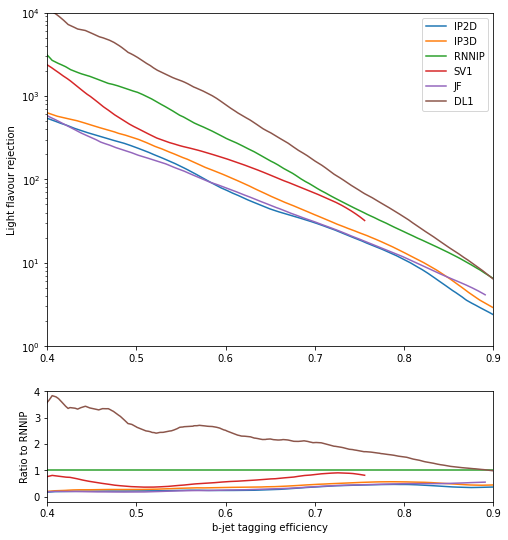

In [23]:
roc_lrej(nominal,'ttbat',x_int)

<ipython-input-7-cead8cd644c1>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2_c)],alg.rej_ip2_c/den[0:len(alg.rej_ip2_c)], label='IP2D'+s_den)
<ipython-input-7-cead8cd644c1>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3_c)],alg.rej_ip3_c/den[0:len(alg.rej_ip3_c)], label='IP3D'+s_den)
<ipython-input-7-cead8cd644c1>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip_c)],alg.rej_rnnip_c/den[0:len(alg.rej_rnnip_c)], label='RNNIP'+s_den)
<ipython-input-7-cead8cd644c1>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1_c)],alg.rej_sv1_c/den[0:len(alg.rej_sv1_c)], label='SV1'+s_den)
<ipython-input-7-cead8cd644c1>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf_c)],alg.rej_jf_c/den[0:len(alg.rej_jf_c)], label='JF'+s_den)
<ipython-input-7-cead8cd

<Figure size 432x288 with 0 Axes>

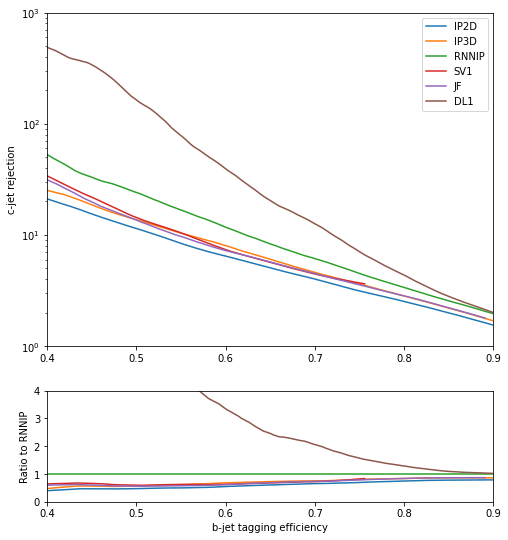

In [16]:
roc_crej(nominal,'nominal',x_int)

In [13]:
ideal=algs(path,file_ideal)

Maximum efficiency \epsilon: ip2d, ip3d, rnnip, sv1, jf, dl1
0.9867218110579016 0.9873022783340589 0.9986213902191264 0.7062835582644028 0.8857205050065302 1.0
0.9964472449389998 0.990347231532377 0.9988604370559057 0.2631720069714439 0.6636948652634401 1.0
0.9905753559963782 0.9873240595933822 0.99115153510577 0.034611902214174005 0.2647954564161659 1.0
0.0014285714285714286

<ipython-input-5-881ba0e266ca>:152: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip2d_rej=np.append(empf201903_rocip2d_rej,1./y)
<ipython-input-5-881ba0e266ca>:153: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip2d_rej_c=np.append(empf201903_rocip2d_rej_c,1./y_c)
<ipython-input-5-881ba0e266ca>:159: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip3d_rej=np.append(empf201903_rocip3d_rej,1./y)
<ipython-input-5-881ba0e266ca>:160: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip3d_rej_c=np.append(empf201903_rocip3d_rej_c,1./y_c)
<ipython-input-5-881ba0e266ca>:166: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocrnnip_rej=np.append(empf201903_rocrnnip_rej,1./y)
<ipython-input-5-881ba0e266ca>:167: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocrnnip_rej_c=np.append(empf201903_rocrnnip_rej_c,1./y_c)
<ipython-inp

679992857142857143565


In [14]:
pseudo=algs(path,file_pseudo)

Maximum efficiency \epsilon: ip2d, ip3d, rnnip, sv1, jf, dl1
0.9858769275111687 0.9841475716962098 0.9987029831387808 0.7028390257962243 0.8855742902435509 1.0
0.995732966276669 0.9851342050929112 0.9983482450103235 0.27088781830695113 0.6845147969717825 1.0
0.9902808222010836 0.9832085694197444 0.9909839116588776 0.033831010380909056 0.2765623061334216 1.0
0.0021428571428571436

<ipython-input-5-881ba0e266ca>:152: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip2d_rej=np.append(empf201903_rocip2d_rej,1./y)
<ipython-input-5-881ba0e266ca>:153: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip2d_rej_c=np.append(empf201903_rocip2d_rej_c,1./y_c)
<ipython-input-5-881ba0e266ca>:159: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip3d_rej=np.append(empf201903_rocip3d_rej,1./y)
<ipython-input-5-881ba0e266ca>:160: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocip3d_rej_c=np.append(empf201903_rocip3d_rej_c,1./y_c)
<ipython-input-5-881ba0e266ca>:166: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocrnnip_rej=np.append(empf201903_rocrnnip_rej,1./y)
<ipython-input-5-881ba0e266ca>:167: RuntimeWarning: divide by zero encountered in double_scalars
  empf201903_rocrnnip_rej_c=np.append(empf201903_rocrnnip_rej_c,1./y_c)
<ipython-inp

679992857142857143565


In [14]:
x_int=[0.4,0.9]

<ipython-input-56-275b10ae2cc5>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2)],alg.rej_ip2[0:len(alg.rej_ip2)]/den[0:len(alg.rej_ip2)], label='IP2D'+s_den)
<ipython-input-56-275b10ae2cc5>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3)],alg.rej_ip3[0:len(alg.rej_ip3)]/den[0:len(alg.rej_ip3)], label='IP3D'+s_den)
<ipython-input-56-275b10ae2cc5>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip)],alg.rej_rnnip[0:len(alg.rej_rnnip)]/den[0:len(alg.rej_rnnip)], label='RNNIP'+s_den)
<ipython-input-56-275b10ae2cc5>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1)],alg.rej_sv1[0:len(alg.rej_sv1)]/den[0:len(alg.rej_sv1)], label='SV1'+s_den)
<ipython-input-56-275b10ae2cc5>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf)],alg.rej_jf[0:len(alg

<Figure size 432x288 with 0 Axes>

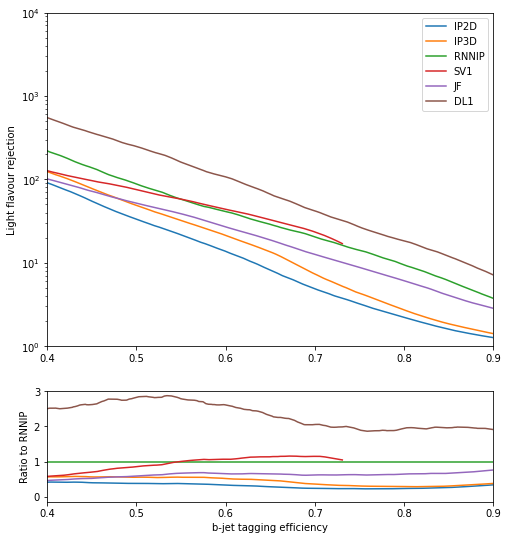

In [64]:
roc_lrej(nominal,'nominal',x_int)

<ipython-input-56-275b10ae2cc5>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2)],alg.rej_ip2[0:len(alg.rej_ip2)]/den[0:len(alg.rej_ip2)], label='IP2D'+s_den)
<ipython-input-56-275b10ae2cc5>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3)],alg.rej_ip3[0:len(alg.rej_ip3)]/den[0:len(alg.rej_ip3)], label='IP3D'+s_den)
<ipython-input-56-275b10ae2cc5>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip)],alg.rej_rnnip[0:len(alg.rej_rnnip)]/den[0:len(alg.rej_rnnip)], label='RNNIP'+s_den)
<ipython-input-56-275b10ae2cc5>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1)],alg.rej_sv1[0:len(alg.rej_sv1)]/den[0:len(alg.rej_sv1)], label='SV1'+s_den)
<ipython-input-56-275b10ae2cc5>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf)],alg.rej_jf[0:len(alg

<Figure size 432x288 with 0 Axes>

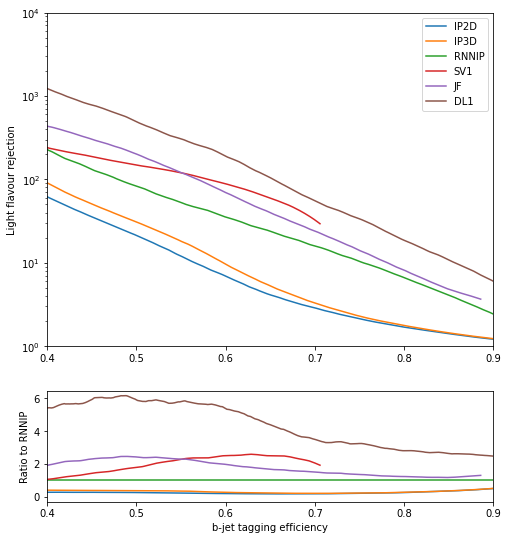

In [66]:
roc_lrej(ideal,'ideal',x_int)

<ipython-input-56-275b10ae2cc5>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2)],alg.rej_ip2[0:len(alg.rej_ip2)]/den[0:len(alg.rej_ip2)], label='IP2D'+s_den)
<ipython-input-56-275b10ae2cc5>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3)],alg.rej_ip3[0:len(alg.rej_ip3)]/den[0:len(alg.rej_ip3)], label='IP3D'+s_den)
<ipython-input-56-275b10ae2cc5>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip)],alg.rej_rnnip[0:len(alg.rej_rnnip)]/den[0:len(alg.rej_rnnip)], label='RNNIP'+s_den)
<ipython-input-56-275b10ae2cc5>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1)],alg.rej_sv1[0:len(alg.rej_sv1)]/den[0:len(alg.rej_sv1)], label='SV1'+s_den)
<ipython-input-56-275b10ae2cc5>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf)],alg.rej_jf[0:len(alg

<Figure size 432x288 with 0 Axes>

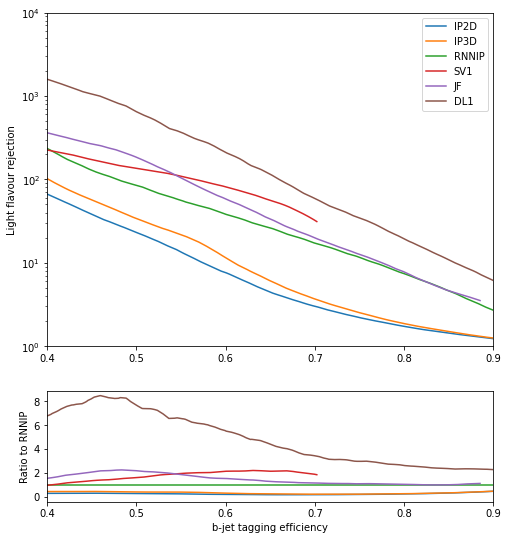

In [67]:
roc_lrej(pseudo,'pseudo',x_int)

<ipython-input-78-cead8cd644c1>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2_c)],alg.rej_ip2_c/den[0:len(alg.rej_ip2_c)], label='IP2D'+s_den)
<ipython-input-78-cead8cd644c1>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3_c)],alg.rej_ip3_c/den[0:len(alg.rej_ip3_c)], label='IP3D'+s_den)
<ipython-input-78-cead8cd644c1>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip_c)],alg.rej_rnnip_c/den[0:len(alg.rej_rnnip_c)], label='RNNIP'+s_den)
<ipython-input-78-cead8cd644c1>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1_c)],alg.rej_sv1_c/den[0:len(alg.rej_sv1_c)], label='SV1'+s_den)
<ipython-input-78-cead8cd644c1>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf_c)],alg.rej_jf_c/den[0:len(alg.rej_jf_c)], label='JF'+s_den)
<ipython-input-78-c

<Figure size 432x288 with 0 Axes>

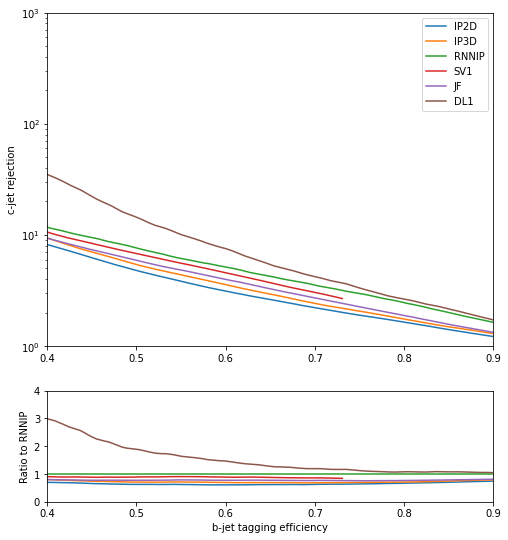

In [79]:
roc_crej(nominal,'nominal',x_int)

<ipython-input-78-cead8cd644c1>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2_c)],alg.rej_ip2_c/den[0:len(alg.rej_ip2_c)], label='IP2D'+s_den)
<ipython-input-78-cead8cd644c1>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3_c)],alg.rej_ip3_c/den[0:len(alg.rej_ip3_c)], label='IP3D'+s_den)
<ipython-input-78-cead8cd644c1>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip_c)],alg.rej_rnnip_c/den[0:len(alg.rej_rnnip_c)], label='RNNIP'+s_den)
<ipython-input-78-cead8cd644c1>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1_c)],alg.rej_sv1_c/den[0:len(alg.rej_sv1_c)], label='SV1'+s_den)
<ipython-input-78-cead8cd644c1>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf_c)],alg.rej_jf_c/den[0:len(alg.rej_jf_c)], label='JF'+s_den)
<ipython-input-78-c

<Figure size 432x288 with 0 Axes>

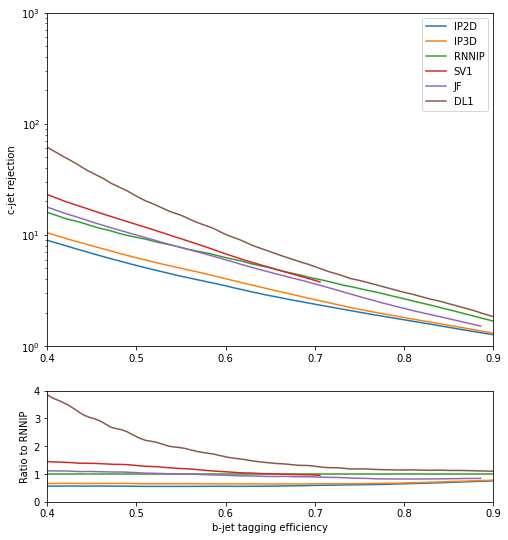

In [80]:
roc_crej(ideal,'ideal',x_int)

<ipython-input-78-cead8cd644c1>:26: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip2_c)],alg.rej_ip2_c/den[0:len(alg.rej_ip2_c)], label='IP2D'+s_den)
<ipython-input-78-cead8cd644c1>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_ip3_c)],alg.rej_ip3_c/den[0:len(alg.rej_ip3_c)], label='IP3D'+s_den)
<ipython-input-78-cead8cd644c1>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_rnnip_c)],alg.rej_rnnip_c/den[0:len(alg.rej_rnnip_c)], label='RNNIP'+s_den)
<ipython-input-78-cead8cd644c1>:29: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_sv1_c)],alg.rej_sv1_c/den[0:len(alg.rej_sv1_c)], label='SV1'+s_den)
<ipython-input-78-cead8cd644c1>:30: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(alg.x_ax[0:len(alg.rej_jf_c)],alg.rej_jf_c/den[0:len(alg.rej_jf_c)], label='JF'+s_den)
<ipython-input-78-c

<Figure size 432x288 with 0 Axes>

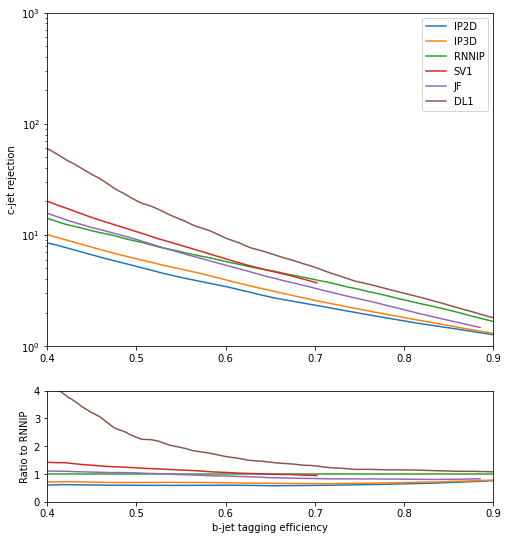

In [82]:
roc_crej(pseudo,'pseudo',x_int)

<ipython-input-87-2ebdd4f2c738>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip2[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:41: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip3[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:78: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_sv1[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:91: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_jf[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:128: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_rnnip[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/'+s_den)
<

<Figure size 432x288 with 0 Axes>

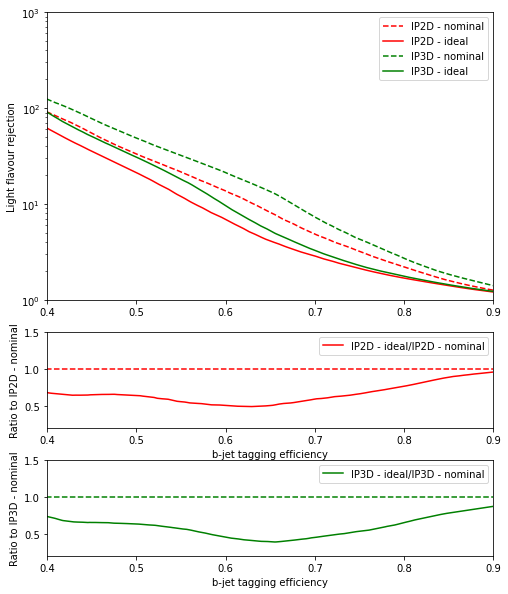

<Figure size 432x288 with 0 Axes>

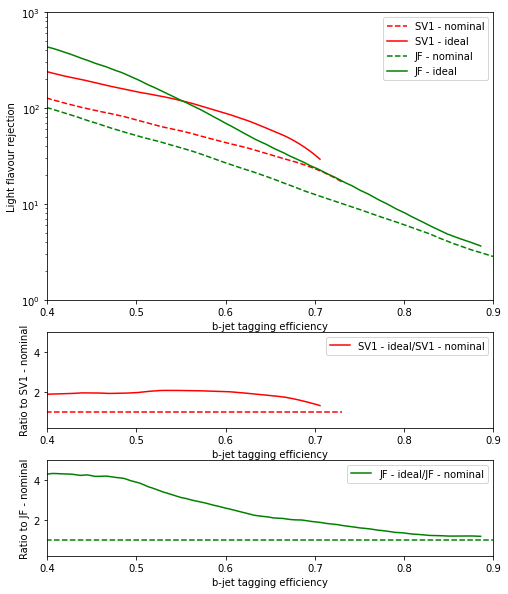

<Figure size 432x288 with 0 Axes>

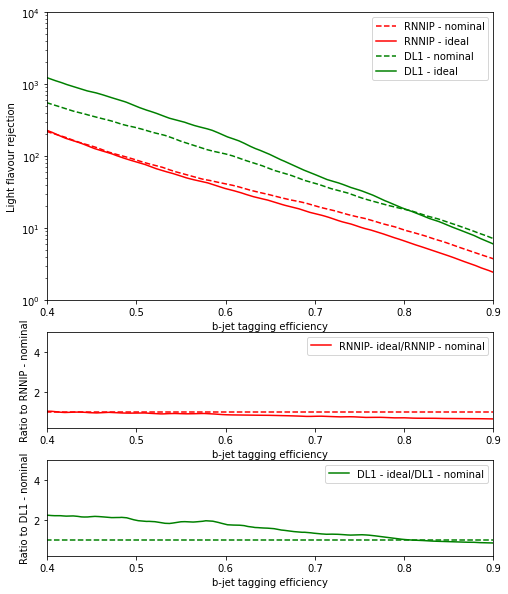

In [88]:
rec_lconf(nominal,"nominal",ideal,"ideal",x_int)

<ipython-input-94-16532a700a57>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip2_c[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:39: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip3_c[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:75: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_sv1_c[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:87: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_jf_c[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:123: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_rnnip_c[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/

<Figure size 432x288 with 0 Axes>

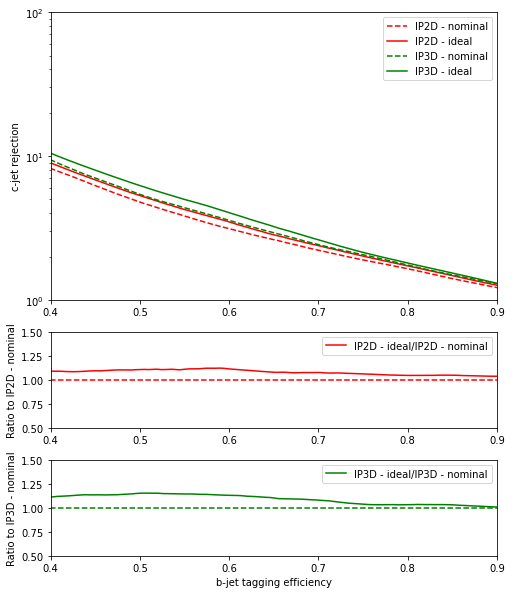

<Figure size 432x288 with 0 Axes>

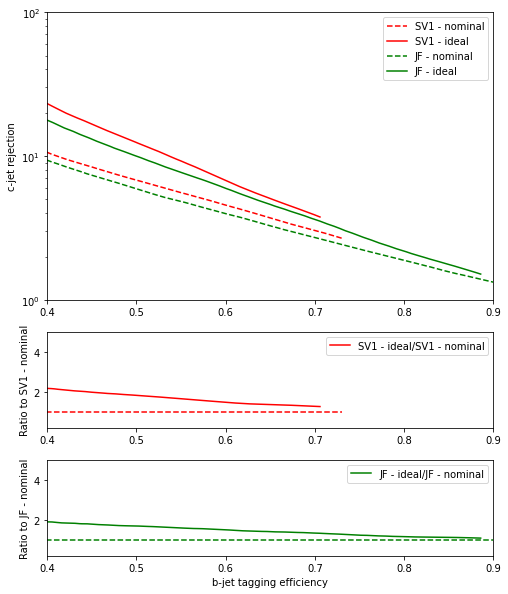

<Figure size 432x288 with 0 Axes>

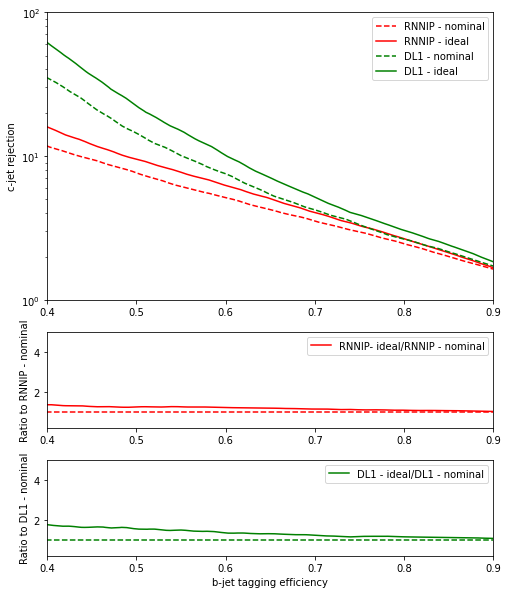

In [95]:
rec_cconf(nominal,"nominal",ideal,"ideal",x_int)

<ipython-input-87-2ebdd4f2c738>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip2[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:41: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip3[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:78: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_sv1[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:91: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_jf[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:128: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_rnnip[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/'+s_den)
<

<Figure size 432x288 with 0 Axes>

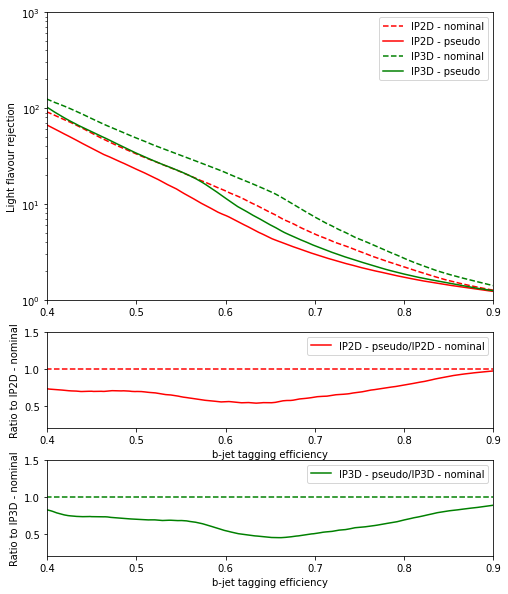

<Figure size 432x288 with 0 Axes>

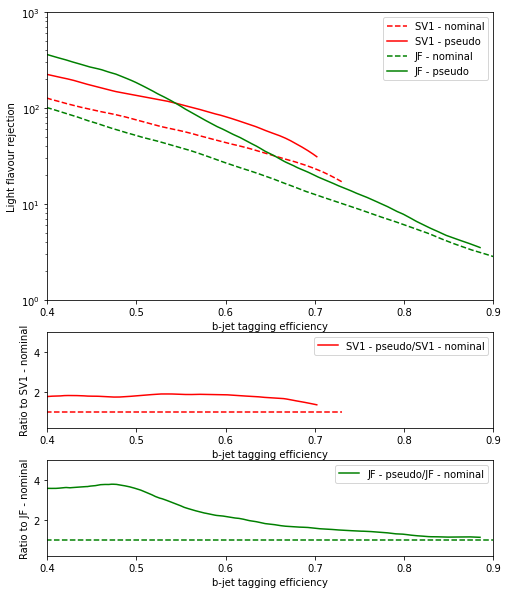

<Figure size 432x288 with 0 Axes>

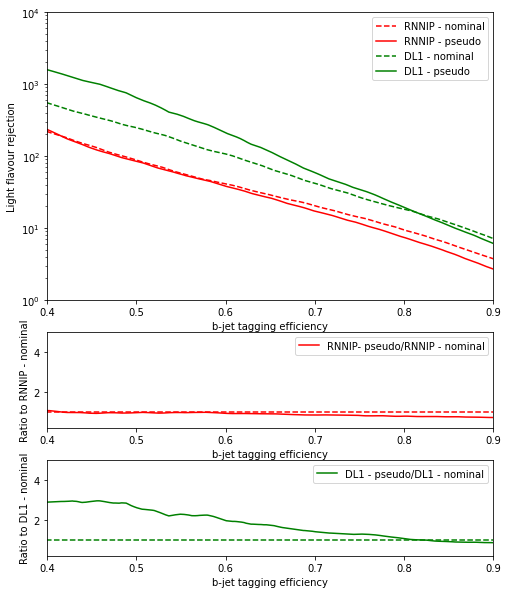

In [96]:
rec_lconf(nominal,"nominal",pseudo,"pseudo",x_int)

<ipython-input-94-16532a700a57>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip2_c[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:39: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip3_c[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:75: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_sv1_c[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:87: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_jf_c[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:123: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_rnnip_c[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/

<Figure size 432x288 with 0 Axes>

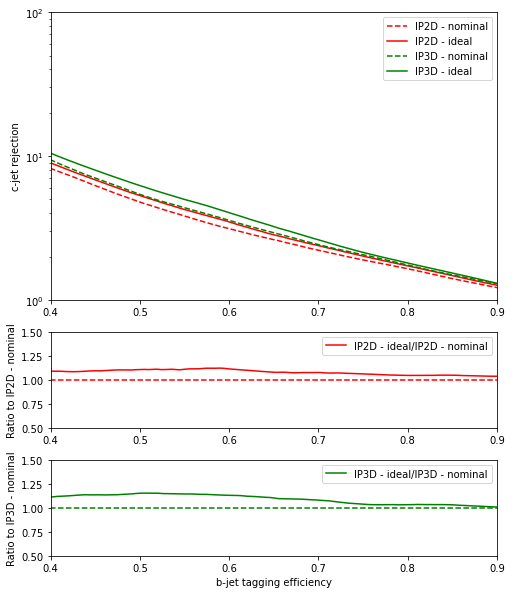

<Figure size 432x288 with 0 Axes>

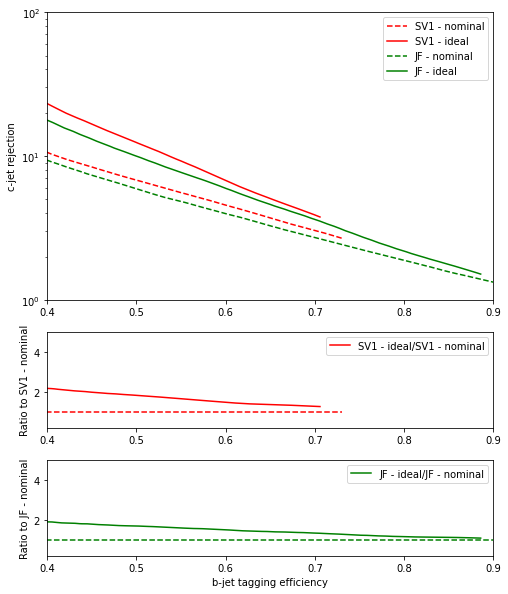

<Figure size 432x288 with 0 Axes>

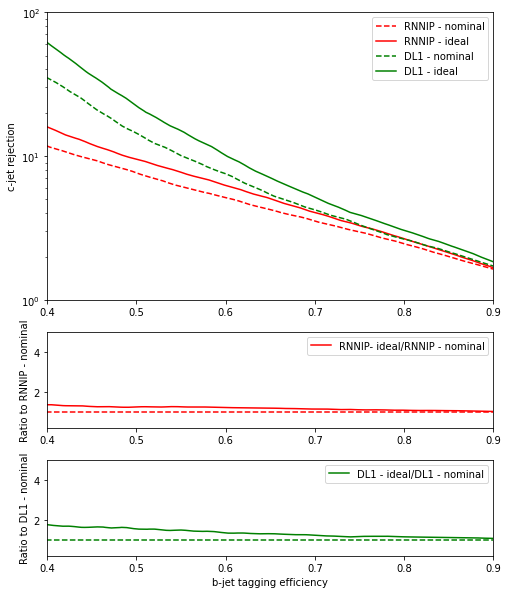

In [97]:
rec_cconf(nominal,"nominal",ideal,"ideal",x_int)

<ipython-input-87-2ebdd4f2c738>:28: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip2[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:41: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip3[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:78: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_sv1[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:91: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_jf[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)
<ipython-input-87-2ebdd4f2c738>:128: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_rnnip[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/'+s_den)
<

<Figure size 432x288 with 0 Axes>

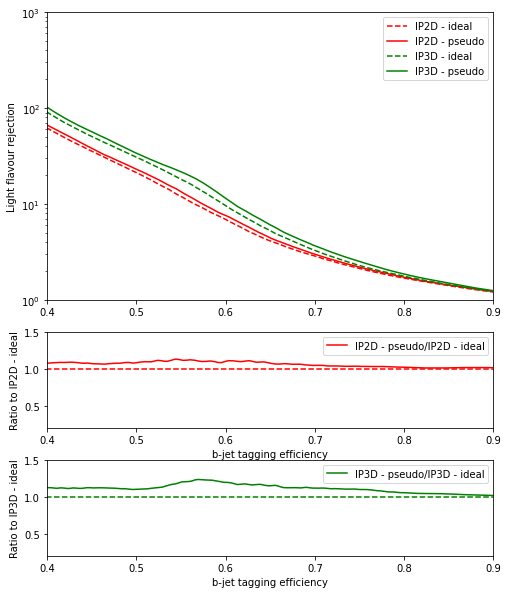

<Figure size 432x288 with 0 Axes>

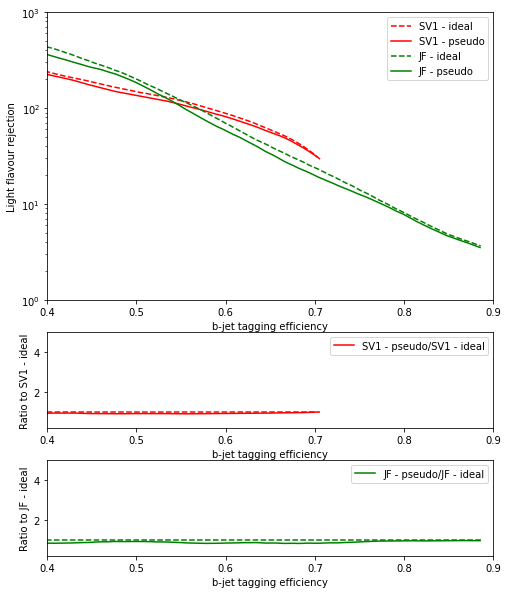

<Figure size 432x288 with 0 Axes>

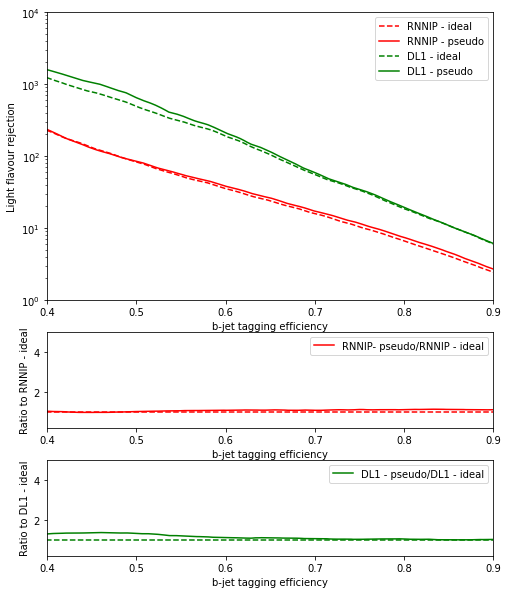

In [98]:
rec_lconf(ideal,"ideal",pseudo,"pseudo",x_int)

<ipython-input-94-16532a700a57>:27: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip2_c[0:len_min]/den[0:len_min], 'r', label='IP2D - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:39: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_ip3_c[0:len_min]/den[0:len_min], 'g', label='IP3D - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:75: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_sv1_c[0:len_min]/den[0:len_min], 'r', label='SV1 - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:87: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_jf_c[0:len_min]/den[0:len_min], 'g', label='JF - '+mode_2+'/'+s_den)
<ipython-input-94-16532a700a57>:123: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(x_ax[0:len_min],alg_2.rej_rnnip_c[0:len_min]/den[0:len_min], 'r', label='RNNIP- '+mode_2+'/

<Figure size 432x288 with 0 Axes>

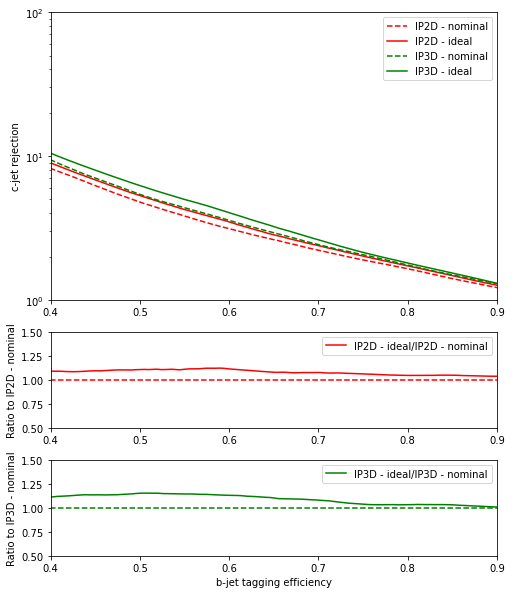

<Figure size 432x288 with 0 Axes>

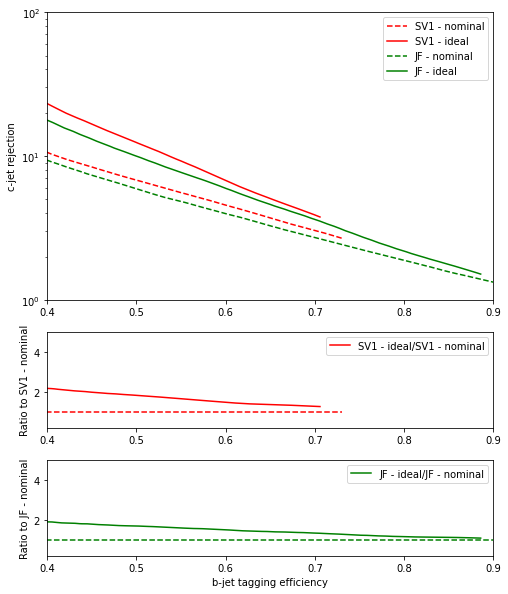

<Figure size 432x288 with 0 Axes>

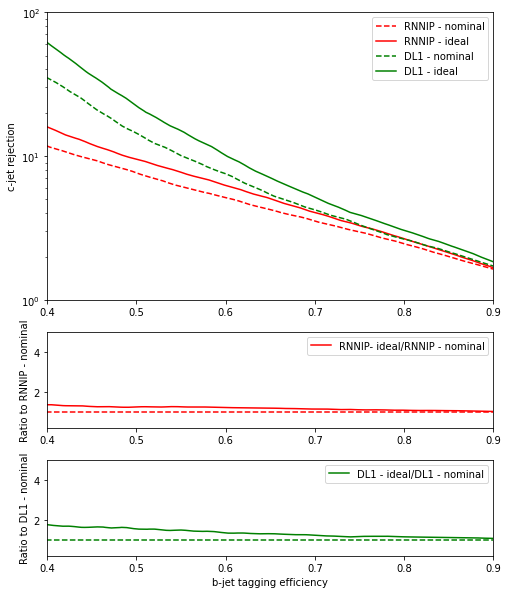

In [99]:
rec_cconf(nominal,"nominal",ideal,"ideal",x_int)